# TOI 2266 b parameter estimates from the multicolour analysis

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import xarray as xa
import pandas as pd
import seaborn as sb
import astropy.constants as c

from corner import corner
from astropy.units import AU, Rsun, Rjup, Rearth
from pytransit.orbits import as_from_rhop, i_from_ba, d_from_pkaiews, epoch
from pytransit.contamination.plotting import joint_marginal_plot, plot_kdist, plot_two_sided_kde
from mcv.plotting import _jplot
from pytransit.orbits import epoch
from src.core import *

In [3]:
%run src/core.py

In [4]:
dfa = read_mcmc('toi-2266.01-joint-uncontaminated.nc')
dfc = read_mcmc('results/TOI-2266.01-joint-contaminated.nc')

## Bolometric insolation

<AxesSubplot:>

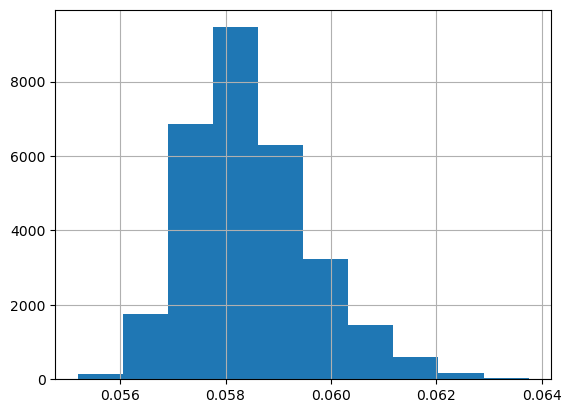

In [5]:
sqrt(dfa.k2).hist()

In [6]:
1 - dfc.k2_app.median() / 0.19**2

0.9050428272476023

In [7]:
c = 1 - kapp / ktrue

NameError: name 'kapp' is not defined

In [ ]:
c = 0.5
sqrt((dfc.k2_app.median() / (1-c)))

In [56]:
c = 0.5
(sqrt((dfc.k2_app.median() / (1-c))) * 0.224 * u.R_sun).to(u.R_earth)

<Quantity 2.02307128 earthRad>

In [62]:
sqrt(dfc.k2_app.median())

0.058548731295917575

In [ ]:
(1 - dfc.k2_app.median()) / 

In [50]:
1-dfc.k2_app_tess.median()

0.9965959624694254

In [47]:
1 - dfc.k2_app_tess.median() / 0.36**2

0.9737342783134678

In [25]:
percentile(sqrt(dfc.k2_true), 99)

0.1877877811303007

In [26]:
(0.19 * 0.24 * u.R_sun).to(u.R_earth)

<Quantity 4.9738825 earthRad>

In [31]:
percentile(dfc.cnt, 99)

0.9029482983943848

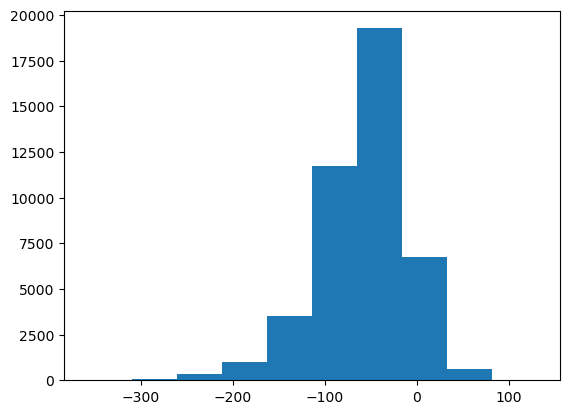

In [42]:
m = dfc.cnt > 0.4
hist((dfc.teff_c - dfc.teff_h)[m]);

In [46]:
dfc.k2_app_tess.median()

0.0034040375305745647

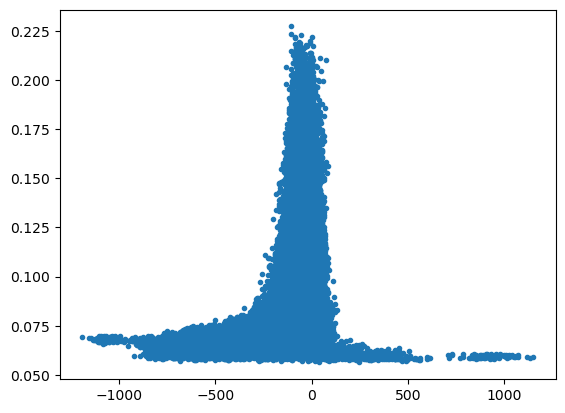

In [44]:
plot(dfc.teff_c - dfc.teff_h, sqrt(dfc.k2_true), '.')

(array([ 46., 126., 268., 408., 352., 307., 189.,  65.,  25.,   5.]),
 array([0.00227495, 0.04370123, 0.08512752, 0.1265538 , 0.16798009,
        0.20940637, 0.25083266, 0.29225894, 0.33368523, 0.37511151,
        0.4165378 ]),
 <BarContainer object of 10 artists>)

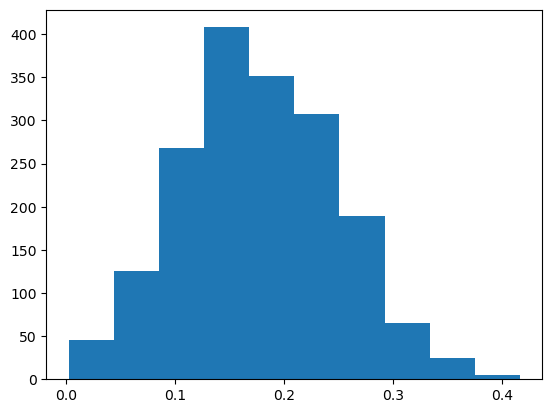

In [60]:
dt = dfc.teff_c - dfc.teff_h
m = (dt > -450) & (dt < -350)
hist(dfc.cnt[m])

<AxesSubplot:>

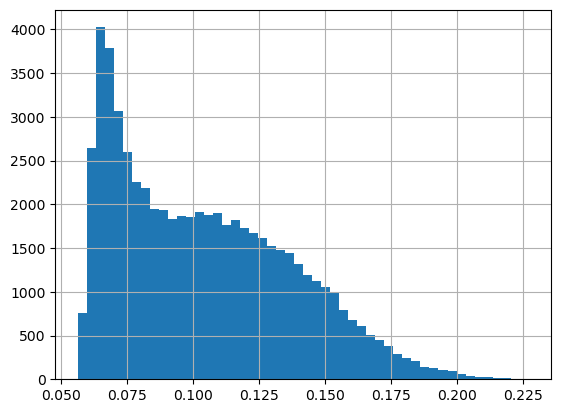

In [16]:
sqrt(dfc.k2_true).hist(bins=50)

In [8]:
dteffa = normal(star_teff.n, star_teff.s, size=dfa.shape[0])
dteffc = normal(star_teff.n, star_teff.s, size=dfc.shape[0])

In [9]:
dfa['insolation'] = (dteffa / 5778.0)**4 * ((c.au / c.R_sun) / dfa.a_st)**2
dfc['insolation'] = (dteffc / 5778.0)**4 * ((c.au / c.R_sun) / dfc.a_st)**2

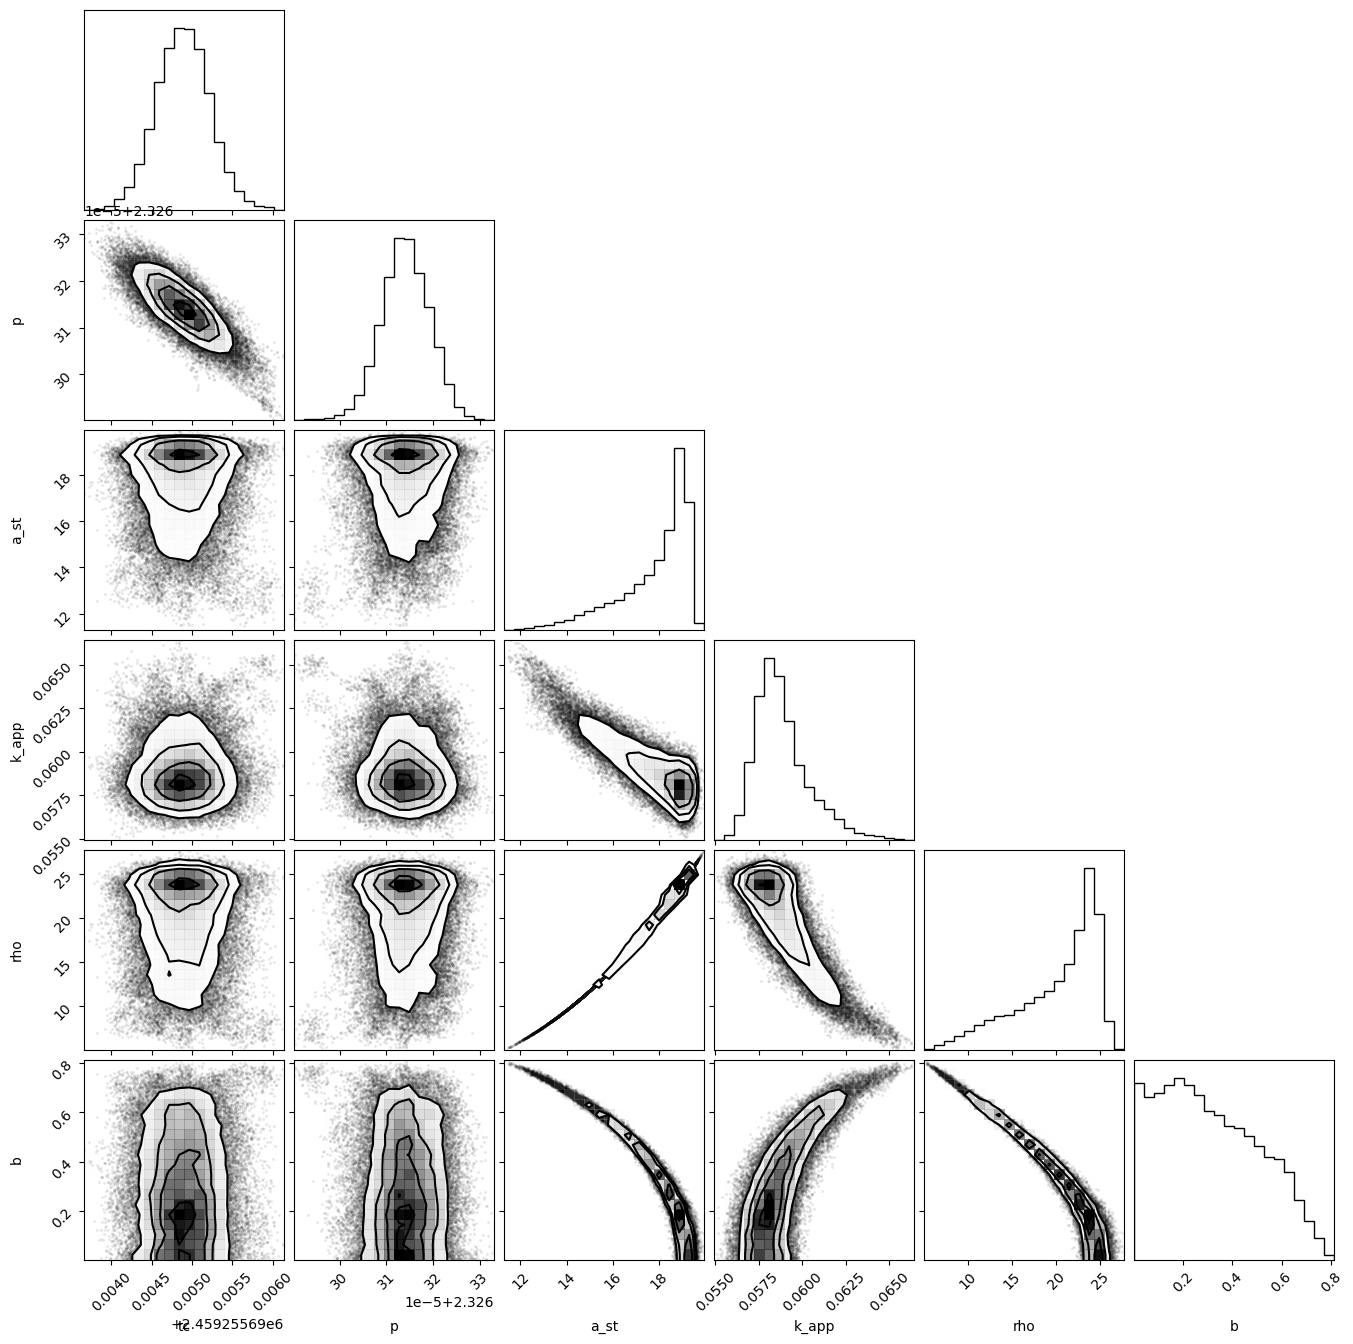

In [7]:
ccols = 'tc p a_st k_app rho b'.split()
corner(dfc[ccols].values, labels=ccols);

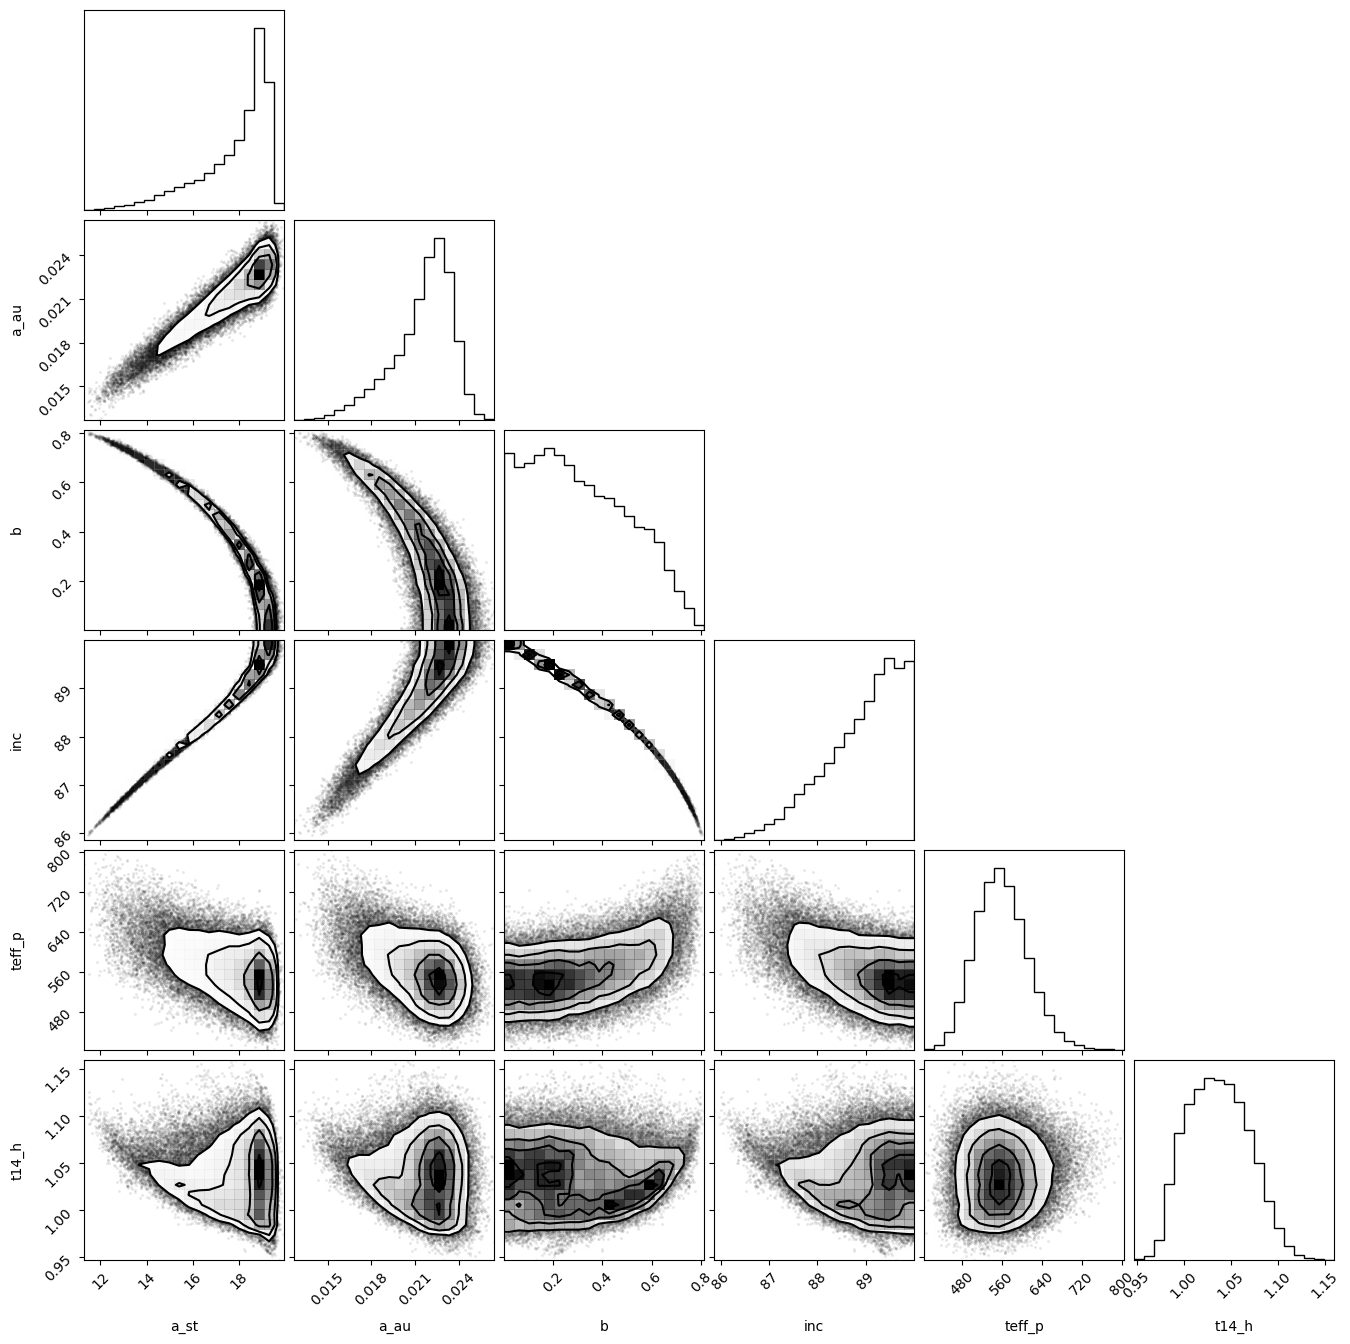

In [22]:
ccols = 'a_st a_au b inc teff_p t14_h'.split()
corner(dfc[ccols].values, labels=ccols);

In [10]:
dfc

,tc,p,rho,b,k2_app,k2_true,teff_h,teff_c,k2_app_tess,q1_tess,...,cnt,cnt_tess,delta_teff,t14,t14_h,r_app,r_true,r_app_rsun,r_true_rsun,insolation
0,2.459256e+06,2.326316,21.685263,0.283894,0.003430,0.016798,3057.828577,2992.045506,0.003576,0.797839,...,0.795824,0.787091,-65.783071,0.044093,1.058223,1.504246,3.329018,0.013791,0.030520,13.300242
1,2.459256e+06,2.326316,22.804008,0.213489,0.003395,0.016407,3098.088694,3051.153082,0.003570,0.794979,...,0.793062,0.782429,-46.935612,0.043926,1.054224,1.474538,3.241428,0.013518,0.029717,9.071246
2,2.459256e+06,2.326316,23.300847,0.190663,0.003414,0.022167,3151.994246,3075.965728,0.003746,0.795577,...,0.846009,0.831028,-76.028517,0.044606,1.070544,1.559700,3.974596,0.014299,0.036439,13.468526
3,2.459256e+06,2.326316,24.377398,0.145104,0.003393,0.028688,3095.113163,3043.817552,0.003710,0.792297,...,0.881719,0.870665,-51.295611,0.045001,1.080020,1.483923,4.314730,0.013604,0.039557,14.395973
4,2.459256e+06,2.326316,23.776617,0.175134,0.003396,0.026553,3127.492633,3076.154128,0.003616,0.788945,...,0.872112,0.863817,-51.338505,0.044961,1.079059,1.512426,4.229209,0.013866,0.038773,13.619288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.459256e+06,2.326317,24.507073,0.050623,0.003413,0.006770,3176.278362,3076.674388,0.003244,0.769588,...,0.495803,0.520794,-99.603974,0.041849,1.004376,1.468985,2.068794,0.013467,0.018966,13.205340
59996,2.459256e+06,2.326318,25.071753,0.038161,0.003426,0.009719,3182.296320,3110.509540,0.003253,0.770835,...,0.647487,0.665346,-71.786780,0.042179,1.012301,1.463778,2.465399,0.013420,0.022603,9.435835
59997,2.459256e+06,2.326319,25.286658,0.012664,0.003396,0.009544,3197.642753,3114.803982,0.003127,0.772377,...,0.644116,0.672295,-82.838772,0.042048,1.009140,1.541925,2.584694,0.014136,0.023696,12.350547
59998,2.459256e+06,2.326319,25.012697,0.015271,0.003380,0.009124,3160.743519,3081.467507,0.003110,0.771315,...,0.629572,0.659120,-79.276012,0.042116,1.010777,1.463166,2.404039,0.013414,0.022040,12.034419


<AxesSubplot:>

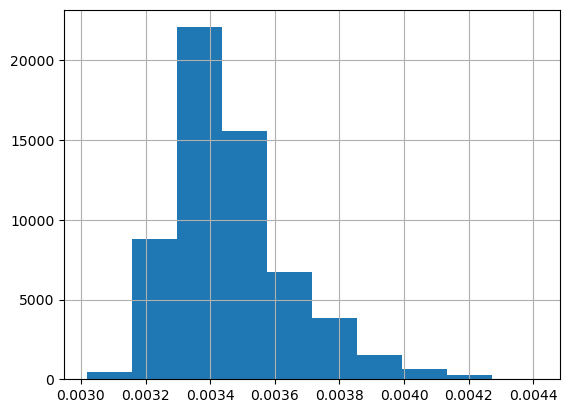

In [13]:
dfc.k2_app.hist()

<AxesSubplot:>

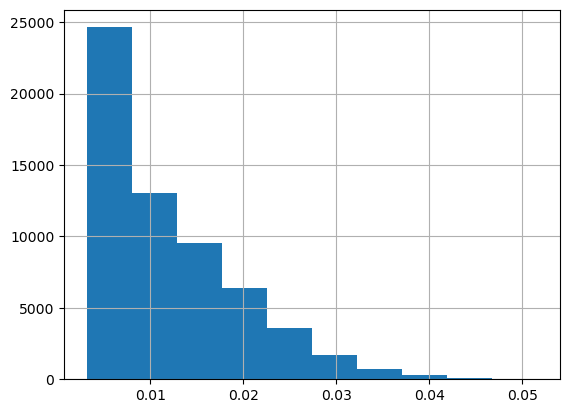

In [14]:
dfc.k2_true.hist()

<AxesSubplot:>

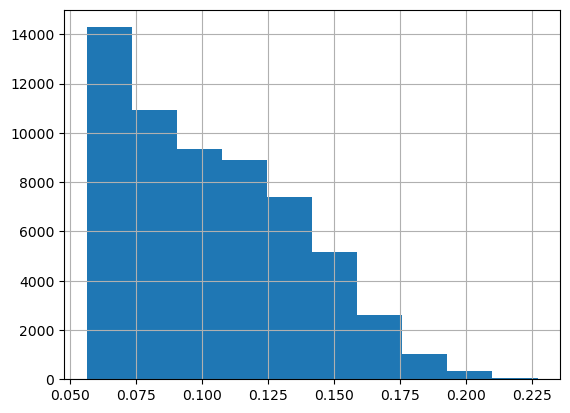

In [19]:
dfc.k_true.hist()

<AxesSubplot:>

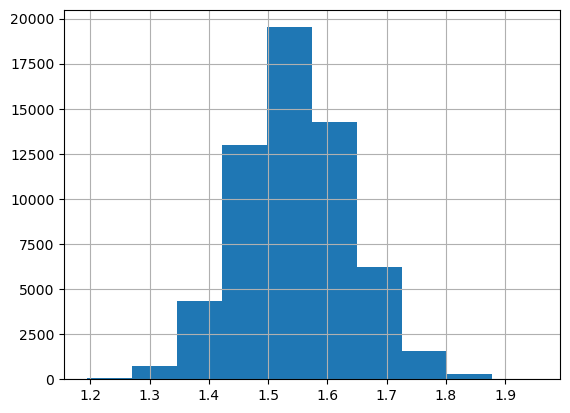

In [24]:
dfc.r_app.hist()

In [27]:
from pytransit.contamination import apparent_radius_ratio, true_radius_ratio

In [28]:
apparent_radius_ratio??

In [26]:
0.02 / 0.23

0.08695652173913043

<AxesSubplot:>

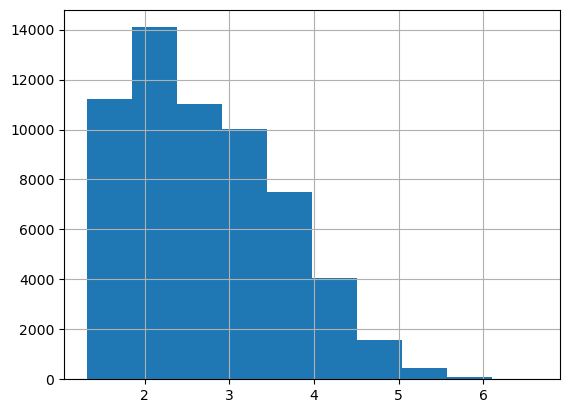

In [23]:
dfc.r_true.hist()

In [21]:
dfc.columns.values

array(['tc', 'p', 'rho', 'b', 'k2_app', 'k2_true', 'teff_h', 'teff_c',
       'k2_app_tess', 'q1_tess', 'q2_tess', 'q1_g', 'q2_g', 'q1_r',
       'q2_r', 'q1_i', 'q2_i', 'q1_z_s', 'q2_z_s', 'wn_loge_0',
       'wn_loge_1', 'wn_loge_2', 'wn_loge_3', 'wn_loge_4', 'wn_loge_5',
       'wn_loge_6', 'wn_loge_7', 'wn_loge_8', 'wn_loge_9', 'wn_loge_10',
       'wn_loge_11', 'wn_loge_12', 'wn_loge_13', 'wn_loge_14',
       'wn_loge_15', 'wn_loge_16', 'wn_loge_17', 'wn_loge_18',
       'wn_loge_19', 'wn_loge_20', 'wn_loge_21', 'wn_loge_22',
       'wn_loge_23', 'wn_loge_24', 'wn_loge_25', 'wn_loge_26',
       'wn_loge_27', 'wn_loge_28', 'wn_loge_29', 'wn_loge_30',
       'wn_loge_31', 'wn_loge_32', 'wn_loge_33', 'wn_loge_34',
       'wn_loge_35', 'wn_loge_36', 'wn_loge_37', 'wn_loge_38',
       'wn_loge_39', 'wn_loge_40', 'wn_loge_41', 'wn_loge_42',
       'wn_loge_43', 'wn_loge_44', 'wn_loge_45', 'wn_loge_46',
       'wn_loge_47', 'wn_loge_48', 'wn_loge_49', 'wn_loge_50',
       'wn_loge_51', '

In [15]:
parameters = 'tc p rho b k2_app k2_app_tess k2_true teff_h teff_c'.split()
for p in parameters:
    pqs = percentile(dfc[p], [50, 16, 84, 99])
    print (f"{p:10} & {pqs[0]:20.7f} & {mean(abs(pqs[1:3]-pqs[0])):15.6f} & {pqs[1]-pqs[0]:+15.7f} & {pqs[2]-pqs[0]:+15.7f} & P(99) {pqs[-1]:15.7f} \\\\")

tc         &      2459255.6948887 &        0.000320 &      -0.0003236 &      +0.0003169 & P(99) 2459255.6956857 \\
p          &            2.3263141 &        0.000005 &      -0.0000050 &      +0.0000052 & P(99)       2.3263254 \\
rho        &           21.6961574 &        4.761802 &      -6.8729232 &      +2.6506813 & P(99)      25.8899649 \\
b          &            0.2861852 &        0.223627 &      -0.1932562 &      +0.2539977 & P(99)       0.7366767 \\
k2_app     &            0.0034280 &        0.000170 &      -0.0001284 &      +0.0002122 & P(99)       0.0040695 \\
k2_app_tess &            0.0034040 &        0.000372 &      -0.0003669 &      +0.0003767 & P(99)       0.0043146 \\
k2_true    &            0.0098624 &        0.007552 &      -0.0051822 &      +0.0099208 & P(99)       0.0352643 \\
teff_h     &         3208.7830121 &      174.428469 &    -186.3443138 &    +162.5126247 & P(99)    3598.6352015 \\
teff_c     &         3107.6802718 &      220.911950 &    -251.2597331 &    +190

In [17]:
parameters = 'tc p rho b inc k r a_st a_au t14_h teff_p insolation'.split()
for p in parameters:
    pqs = percentile(dfa[p], [50, 16, 84, 99])
    print (f"{p:10} & {pqs[0]:20.7f} & {mean(abs(pqs[1:3]-pqs[0])):15.6f} & {pqs[1]-pqs[0]:+15.7f} & {pqs[2]-pqs[0]:+15.7f} & P(99) {pqs[-1]:15.7f} \\\\")

tc         &      2459255.6947912 &        0.000273 &      -0.0002485 &      +0.0002984 & P(99) 2459255.6955249 \\
p          &            2.3263177 &        0.000005 &      -0.0000052 &      +0.0000042 & P(99)       2.3263271 \\
rho        &           21.9578537 &        3.700792 &      -4.9102262 &      +2.4913570 & P(99)      25.8275058 \\
b          &            0.2809917 &        0.189124 &      -0.1854422 &      +0.1928051 & P(99)       0.6382016 \\
inc        &           89.1277002 &        0.657751 &      -0.7289762 &      +0.5865252 & P(99)      89.9800179 \\
k          &            0.0583122 &        0.001124 &      -0.0009451 &      +0.0013039 & P(99)       0.0618002 \\
r          &            1.5359286 &        0.087584 &      -0.0855288 &      +0.0896386 & P(99)       1.7489524 \\
a_st       &           18.4514009 &        1.082957 &      -1.4928865 &      +0.6730283 & P(99)      19.4772548 \\
a_au       &            0.0204454 &        0.001643 &      -0.0017899 &      +0.

In [21]:
pqs = percentile(dfa.r, [50, 16, 84, 99])
print(f"\\newcommand{{\\rmedian}}{{{pqs[0]:.2f}\\xspace}}")
print(f"\\newcommand{{\\rerror}}{{{mean(abs(pqs[1:3]-pqs[0])):.2f}\\xspace}}")

\newcommand{\rmedian}{1.54\xspace}
\newcommand{\rerror}{0.09\xspace}


In [22]:
pars = 'k r'.split()
names = 'k r'.split()
lims = 'median lower upper'.split()

for i,p in enumerate(pars):
    qs = dfa[p].quantile([0.5, 0.05, 0.95])
    for j,q in enumerate(qs):
        print(f"\\newcommand{{\\{names[i]}{lims[j]}}}{{{q:.3f}\\xspace}}")

\newcommand{\kmedian}{0.058\xspace}
\newcommand{\klower}{0.057\xspace}
\newcommand{\kupper}{0.061\xspace}
\newcommand{\rmedian}{1.536\xspace}
\newcommand{\rlower}{1.394\xspace}
\newcommand{\rupper}{1.686\xspace}


In [13]:
dfc

,tc,p,rho,b,k2_app,k2_true,teff_h,teff_c,k2_app_tess,q1_tess,...,cnt,cnt_tess,delta_teff,t14,t14_h,r_app,r_true,r_app_rsun,r_true_rsun,insolation
0,2.459256e+06,2.326316,21.685263,0.283894,0.003430,0.016798,3057.828577,2992.045506,0.003576,0.797839,...,0.795824,0.787091,-65.783071,0.044093,1.058223,1.660973,3.675868,0.015228,0.033700,13.252258
1,2.459256e+06,2.326316,22.804008,0.213489,0.003395,0.016407,3098.088694,3051.153082,0.003570,0.794979,...,0.793062,0.782429,-46.935612,0.043926,1.054224,1.653399,3.634612,0.015158,0.033322,7.748412
2,2.459256e+06,2.326316,23.300847,0.190663,0.003414,0.022167,3151.994246,3075.965728,0.003746,0.795577,...,0.846009,0.831028,-76.028517,0.044606,1.070544,1.589423,4.050340,0.014572,0.037133,11.124269
3,2.459256e+06,2.326316,24.377398,0.145104,0.003393,0.028688,3095.113163,3043.817552,0.003710,0.792297,...,0.881719,0.870665,-51.295611,0.045001,1.080020,1.528309,4.443787,0.014011,0.040740,13.778721
4,2.459256e+06,2.326316,23.776617,0.175134,0.003396,0.026553,3127.492633,3076.154128,0.003616,0.788945,...,0.872112,0.863817,-51.338505,0.044961,1.079059,1.740632,4.867343,0.015958,0.044623,10.075656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.459256e+06,2.326317,24.507073,0.050623,0.003413,0.006770,3176.278362,3076.674388,0.003244,0.769588,...,0.495803,0.520794,-99.603974,0.041849,1.004376,1.603964,2.258886,0.014705,0.020709,11.321915
59996,2.459256e+06,2.326318,25.071753,0.038161,0.003426,0.009719,3182.296320,3110.509540,0.003253,0.770835,...,0.647487,0.665346,-71.786780,0.042179,1.012301,1.588744,2.675876,0.014565,0.024532,14.234699
59997,2.459256e+06,2.326319,25.286658,0.012664,0.003396,0.009544,3197.642753,3114.803982,0.003127,0.772377,...,0.644116,0.672295,-82.838772,0.042048,1.009140,1.622557,2.719855,0.014875,0.024935,10.396015
59998,2.459256e+06,2.326319,25.012697,0.015271,0.003380,0.009124,3160.743519,3081.467507,0.003110,0.771315,...,0.629572,0.659120,-79.276012,0.042116,1.010777,1.579113,2.594545,0.014477,0.023786,9.307899


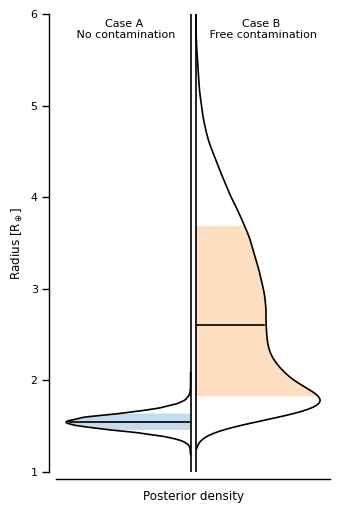

In [14]:
with sb.plotting_context('paper', font_scale=0.9):
    fig, ax = subplots(figsize=(AACW, 1.5*AACW))
    plot_two_sided_kde(dfc.r_app, dfc.r_true, clip=(1, 6), bw=0.1, ax=ax)
    setp(ax, ylabel='Radius [R$_\oplus$]', xlabel='Posterior density', xticks=[], ylim=(1, 6.0))
    ax.text(0.25, 0.99, 'Case A\n No contamination', ha='center', va='top', size=8, transform=ax.transAxes)
    ax.text(0.75, 0.99, 'Case B\n Free contamination', ha='center', va='top', size=8, transform=ax.transAxes)
    sb.despine(fig, offset=5)
    fig.tight_layout()
    #fig.savefig('plots/toi_2266b_radius_posterior.pdf')

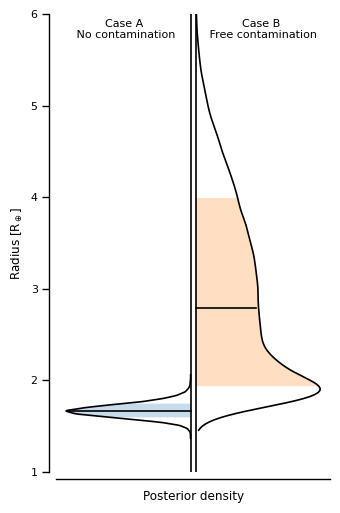

In [38]:
with sb.plotting_context('paper', font_scale=0.9):
    fig, ax = subplots(figsize=(AACW, 1.5*AACW))
    plot_two_sided_kde(dfc.r_app, dfc.r_true, clip=(1, 6), bw=0.1, ax=ax)
    setp(ax, ylabel='Radius [R$_\oplus$]', xlabel='Posterior density', xticks=[], ylim=(1, 6.0))
    ax.text(0.25, 0.99, 'Case A\n No contamination', ha='center', va='top', size=8, transform=ax.transAxes)
    ax.text(0.75, 0.99, 'Case B\n Free contamination', ha='center', va='top', size=8, transform=ax.transAxes)
    sb.despine(fig, offset=5)
    fig.tight_layout()
    #fig.savefig('plots/toi_2266b_radius_posterior.pdf')

In [50]:
dfc.k_app.std() / dfc.k_app.median()

0.026677840479070035

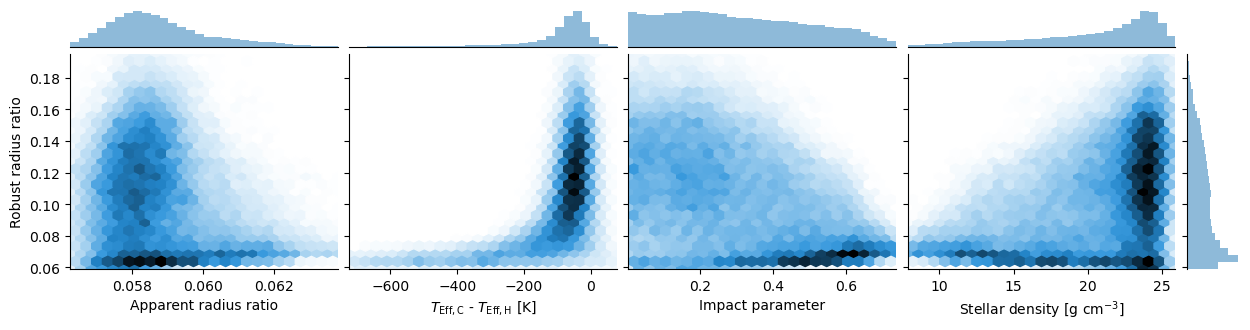

In [16]:
fig = _jplot(dfc[['k_app', 'delta_teff', 'b', 'rho']].values.T, dfc['k_true'].values, fw=10, nb=30, gs=25);
fig.axes[0].set_xlabel('Apparent radius ratio')
fig.axes[0].set_ylabel('Robust radius ratio')
fig.axes[2].set_xlabel('$T_\\mathrm{Eff, C}$ - $T_\\mathrm{Eff, H}$ [K]')
fig.axes[4].set_xlabel('Impact parameter')
fig.axes[6].set_xlabel('Stellar density [g cm$^{-3}$]')
fig.tight_layout()
#fig.savefig('plots/toi_2266b_contamination_posteriors.pdf')

(0.12156862745098052, 0.46666666666666645, 0.7058823529411764)

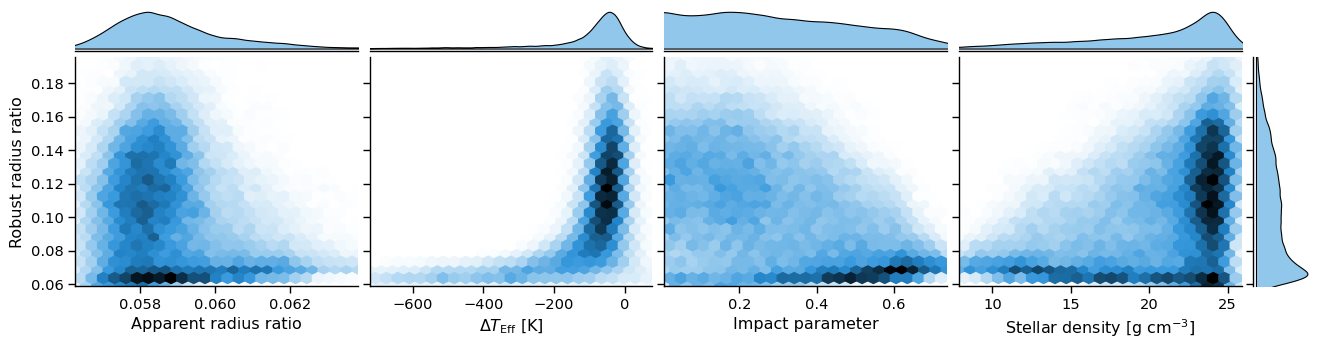

In [66]:
from mcv.plotting import cmap
from arviz import kde
def _jplot(xs, y, xlabels=None, ylabel='', figsize=None, nb=30, gs=25, **kwargs):
    nx = len(xs)
    figsize = figsize or (13, 13/nx)
    fig = figure(figsize=figsize)
    gs_ct = GridSpec(2, nx + 1, bottom=0.15, top=1, left=0.05, right=1, hspace=0.05, wspace=0.05,
                     height_ratios=[0.15, 0.85], width_ratios=nx*[1] + [0.2])

    ylim = percentile(y, [0.5, 99.5])
    yper = percentile(y, [50, 75, 95])
    axs_j = []
    axs_m = []
    for i, x in enumerate(xs):
        xlim = percentile(x, [1, 99])
        aj = subplot(gs_ct[1, i])
        am = subplot(gs_ct[0, i])
        aj.hexbin(x, y, gridsize=gs, cmap=cmap, extent=(xlim[0], xlim[1], ylim[0], ylim[1]))
        kx, ky = kde(x)
        am.fill_between(kx, ky, fc=sb.set_hls_values("C0", l=0.75), ec='k')
        setp(aj, xlim=xlim, ylim=ylim)
        setp(am, xlim=aj.get_xlim())
        setp(am, xticks=[], yticks=[])

        if i > 0:
            setp(aj.get_yticklabels(), visible=False)
        else:
            setp(aj, ylabel=ylabel)
        if xlabels is not None:
            setp(aj, xlabel=xlabels[i])
        axs_j.append(aj)
        axs_m.append(am)

    am = subplot(gs_ct[1, -1])
    kx, ky = kde(y)
    am.fill_betweenx(kx, ky, fc=sb.set_hls_values("C0", l=0.75), ec='k')
    setp(am, ylim=ylim, xticks=[])
    setp(am.get_yticklabels(), visible=False)
    fig.align_labels()
    [sb.despine(ax=ax, left=True, offset=0.1) for ax in axs_m]
    [sb.despine(ax=ax) for ax in axs_j]
    sb.despine(ax=am, bottom=True)
    return fig


with sb.plotting_context('paper', font_scale=1.2):
    fig = _jplot(dfc[['k_app', 'delta_teff', 'b', 'rho']].values.T, dfc['k_true'].values, figsize=None, nb=30, gs=25);
    fig.axes[0].set_xlabel('Apparent radius ratio')
    fig.axes[0].set_ylabel('Robust radius ratio')
    #fig.axes[2].set_xlabel('$T_\\mathrm{Eff, C}$ - $T_\\mathrm{Eff, H}$ [K]')
    fig.axes[2].set_xlabel('$\Delta T_\\mathrm{Eff}$ [K]')
    fig.axes[4].set_xlabel('Impact parameter')
    fig.axes[6].set_xlabel('Stellar density [g cm$^{-3}$]')
    fig.tight_layout()
fig.savefig('plots/toi_2266b_contamination_posteriors.pdf')

In [246]:
c, e = histogram(dfc.r_true, bins=100)

In [247]:
0.5*(e[:-1] + e[1:])[argmax(c)]

1.7955568768668881

In [329]:
from scipy.stats import rayleigh as ll

In [330]:
ln = ll(*ll.fit(dfc.r_true.values[:15000]))

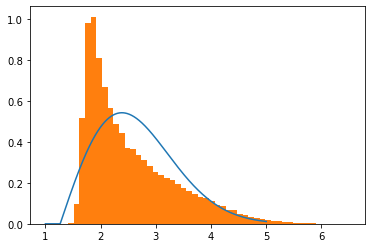

In [331]:
x = linspace(1,5, 1000)
plot(x, ln.pdf(x))
hist(dfc.r_true, density=True, bins=50);

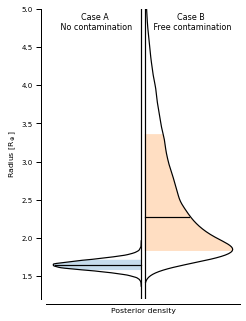

In [257]:
with sb.plotting_context('paper', font_scale=0.8):
    fig, ax = subplots(figsize=(AACW, 1.3*AACW))
    plot_two_sided_kde(dfa.r, dfc.r_true, clip=(1.2, 5), bw=0.1, ax=ax)
    setp(ax, ylabel='Radius [R$_\oplus$]', xlabel='Posterior density', xticks=[], ylim=(1.2, 5.0))
    ax.text(0.25, 0.99, 'Case A\n No contamination', ha='center', va='top', size=8, transform=ax.transAxes)
    ax.text(0.75, 0.99, 'Case B\n Free contamination', ha='center', va='top', size=8, transform=ax.transAxes)
    #ax.axhline(0.5*(e[:-1] + e[1:])[argmax(c)])
    sb.despine(fig, offset=5)
    fig.tight_layout()
    fig.savefig('plots/toi_2266b_radius_posterior.pdf')